In [46]:
import pandas as pd
from pycaret.classification import *

In [47]:
# source_path = 'data_syn.csv'
df = pd.read_csv(r'data_syn.csv', encoding='utf-8')
df

,Unnamed: 0,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,0,salary_plain,regular,white_collar,regular,college,M,1,0,0.173591,...,0,0,0,0,0,1,0,0,0,0
1,1,daily,regular,white_collar,regular,bachelor,M,1,0,0.102009,...,0,0,0,0,0,1,0,0,0,0
2,2,salary_plain,regular,technical,regular,bachelor,F,1,0,0.150471,...,0,0,0,0,0,1,0,0,0,1
3,3,salary_plain,regular,technical,regular,college,F,1,0,2.269341,...,0,0,0,0,0,1,0,0,0,0
4,4,salary_plain,regular,white_collar,regular,high_school,M,1,0,0.154343,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,1233,salary_plain,regular,technical,regular,empty,M,1,0,0.184875,...,0,0,0,0,0,1,0,0,0,0
1234,1234,hourly_field,regular,empty,temporary,high_school,F,1,0,0.094876,...,0,0,0,0,0,1,0,0,0,0
1235,1235,salary_plain,regular,executives,temporary,bachelor,M,1,0,0.232298,...,0,0,0,0,0,1,0,0,0,0
1236,1236,salary_plain,daily,empty,regular,empty,M,1,0,0.009590,...,0,0,0,0,0,1,0,0,0,0


In [48]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,salary_plain,regular,white_collar,regular,college,M,1,0,0.173591,0.005092,...,0,0,0,0,0,1,0,0,0,0
1,daily,regular,white_collar,regular,bachelor,M,1,0,0.102009,0.008167,...,0,0,0,0,0,1,0,0,0,0
2,salary_plain,regular,technical,regular,bachelor,F,1,0,0.150471,0.005297,...,0,0,0,0,0,1,0,0,0,1
3,salary_plain,regular,technical,regular,college,F,1,0,2.269341,0.011570,...,0,0,0,0,0,1,0,0,0,0
4,salary_plain,regular,white_collar,regular,high_school,M,1,0,0.154343,-0.002208,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,salary_plain,regular,technical,regular,empty,M,1,0,0.184875,-0.005995,...,0,0,0,0,0,1,0,0,0,0
1234,hourly_field,regular,empty,temporary,high_school,F,1,0,0.094876,-0.008431,...,0,0,0,0,0,1,0,0,0,0
1235,salary_plain,regular,executives,temporary,bachelor,M,1,0,0.232298,-0.002966,...,0,0,0,0,0,1,0,0,0,0
1236,salary_plain,daily,empty,regular,empty,M,1,0,0.009590,0.002513,...,0,0,0,0,0,1,0,0,0,0


In [49]:
numeric_features = ['pp_turnover',
 'pp_ career_rel',
 'pp_ career_etc',
 'pp_ career_max',
 'pp_ career_hm',
 'pp_turnover_self',
 'pp_turnover_other',
 'pp_relation_family',
 'pp_appointment',
 'pp_appointment_a',
 'pp_appointment_b',
 'pp_appointment_c',
 'pp_appointment_d',
 'pp_appointment_e',
 'pp_appointment_f',
 'pp_ certificate',
 'pp_ certificate_rel',
 'pp_ certificate_etc',
 'pp_age_join',
 'pp_club']

In [9]:
# float들을 int로 바꿔줘야 된다.
dict_round = {}
for column in numeric_features:
    dict_round[column] = 0
# print(dict_round)
    
df = df.round(dict_round)
display(df)

{'pp_turnover': 0, 'pp_ career_rel': 0, 'pp_ career_etc': 0, 'pp_ career_max': 0, 'pp_ career_hm': 0, 'pp_turnover_self': 0, 'pp_turnover_other': 0, 'pp_relation_family': 0, 'pp_appointment': 0, 'pp_appointment_a': 0, 'pp_appointment_b': 0, 'pp_appointment_c': 0, 'pp_appointment_d': 0, 'pp_appointment_e': 0, 'pp_appointment_f': 0, 'pp_ certificate': 0, 'pp_ certificate_rel': 0, 'pp_ certificate_etc': 0, 'pp_age_join': 0, 'pp_club': 0}


,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,salary_plain,regular,white_collar,regular,college,M,1,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,daily,regular,white_collar,regular,bachelor,M,1,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,salary_plain,regular,technical,regular,bachelor,F,1,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,salary_plain,regular,technical,regular,college,F,1,0,2.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,salary_plain,regular,white_collar,regular,high_school,M,1,0,0.0,-0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,salary_plain,regular,technical,regular,empty,M,1,0,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1234,hourly_field,regular,empty,temporary,high_school,F,1,0,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1235,salary_plain,regular,executives,temporary,bachelor,M,1,0,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1236,salary_plain,daily,empty,regular,empty,M,1,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
df['pp_longevity_10y'].value_counts()

0    1175
1      63
Name: pp_longevity_10y, dtype: int64

In [10]:
exp_without_fix_imbal = setup(data = df, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1238, 61)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

In [11]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9540,0.2681,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9425,0.4277,0.0000,0.0000,0.0000,-0.0187,-0.0237
2,0.9425,0.4610,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9425,0.6098,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9310,0.4146,0.0000,0.0000,0.0000,-0.0195,-0.0266
5,0.9310,0.4951,0.0000,0.0000,0.0000,-0.0195,-0.0266
6,0.9419,0.3201,0.0000,0.0000,0.0000,-0.0190,-0.0240
7,0.9535,0.8323,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9419,0.5488,0.0000,0.0000,0.0000,-0.0190,-0.0240
9,0.9535,0.5671,0.0000,0.0000,0.0000,0.0000,0.0000


In [14]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 600 에폭

In [16]:
df = pd.read_csv(r'data_syn_600.csv', encoding='utf-8')
df

,Unnamed: 0,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,0,hourly_field,regular,management,regular,bachelor,F,1,0,-0.132459,...,0,0,0,0,0,0,0,0,0,0
1,1,salary_plain,regular,technical,regular,empty,M,1,0,3.024714,...,0,0,0,0,0,1,0,0,0,1
2,2,salary_executives,regular,empty,daily,high_school,M,1,0,-0.147523,...,0,0,0,0,0,0,0,0,0,0
3,3,salary_plain,regular,technical,regular,empty,M,1,0,2.716726,...,0,1,0,0,0,0,0,0,0,1
4,4,salary_plain,regular,technical,regular,college,M,1,0,-0.173700,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1295,salary_plain,regular,production,regular,bachelor,M,1,0,-0.274286,...,0,0,0,0,0,1,0,0,0,0
1296,1296,salary_plain,regular,executives,temporary,bachelor,F,1,0,3.606720,...,0,0,0,0,0,1,0,0,0,0
1297,1297,salary_plain,regular,empty,regular,high_school,M,1,0,2.313776,...,0,0,0,0,0,0,0,1,0,0
1298,1298,salary_plain,regular,empty,daily,bachelor,M,1,0,2.777008,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,hourly_field,regular,management,regular,bachelor,F,1,0,-0.132459,-0.003450,...,0,0,0,0,0,0,0,0,0,0
1,salary_plain,regular,technical,regular,empty,M,1,0,3.024714,0.006446,...,0,0,0,0,0,1,0,0,0,1
2,salary_executives,regular,empty,daily,high_school,M,1,0,-0.147523,-0.008320,...,0,0,0,0,0,0,0,0,0,0
3,salary_plain,regular,technical,regular,empty,M,1,0,2.716726,0.008223,...,0,1,0,0,0,0,0,0,0,1
4,salary_plain,regular,technical,regular,college,M,1,0,-0.173700,0.009968,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,salary_plain,regular,production,regular,bachelor,M,1,0,-0.274286,0.001422,...,0,0,0,0,0,1,0,0,0,0
1296,salary_plain,regular,executives,temporary,bachelor,F,1,0,3.606720,0.016184,...,0,0,0,0,0,1,0,0,0,0
1297,salary_plain,regular,empty,regular,high_school,M,1,0,2.313776,0.019814,...,0,0,0,0,0,0,0,1,0,0
1298,salary_plain,regular,empty,daily,bachelor,M,1,0,2.777008,0.012845,...,0,0,0,0,0,0,0,0,0,0


In [18]:
numeric_features = ['pp_turnover',
 'pp_ career_rel',
 'pp_ career_etc',
 'pp_ career_max',
 'pp_ career_hm',
 'pp_turnover_self',
 'pp_turnover_other',
 'pp_relation_family',
 'pp_appointment',
 'pp_appointment_a',
 'pp_appointment_b',
 'pp_appointment_c',
 'pp_appointment_d',
 'pp_appointment_e',
 'pp_appointment_f',
 'pp_ certificate',
 'pp_ certificate_rel',
 'pp_ certificate_etc',
 'pp_age_join',
 'pp_club']

In [19]:
# float들을 int로 바꿔줘야 된다.
dict_round = {}
for column in numeric_features:
    dict_round[column] = 0
# print(dict_round)
    
df = df.round(dict_round)
display(df)

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,hourly_field,regular,management,regular,bachelor,F,1,0,-0.0,-0.0,...,0,0,0,0,0,0,0,0,0,0
1,salary_plain,regular,technical,regular,empty,M,1,0,3.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,salary_executives,regular,empty,daily,high_school,M,1,0,-0.0,-0.0,...,0,0,0,0,0,0,0,0,0,0
3,salary_plain,regular,technical,regular,empty,M,1,0,3.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,salary_plain,regular,technical,regular,college,M,1,0,-0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,salary_plain,regular,production,regular,bachelor,M,1,0,-0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1296,salary_plain,regular,executives,temporary,bachelor,F,1,0,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1297,salary_plain,regular,empty,regular,high_school,M,1,0,2.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1298,salary_plain,regular,empty,daily,bachelor,M,1,0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df['pp_longevity_10y'].value_counts()

0    1015
1     285
Name: pp_longevity_10y, dtype: int64

In [21]:
exp_without_fix_imbal = setup(data = df, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1300, 61)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [22]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7363,0.4831,0.0500,0.1667,0.0769,-0.0273,-0.0341
1,0.7802,0.5113,0.1500,0.5000,0.2308,0.1439,0.1798
2,0.7033,0.4387,0.0500,0.1111,0.0690,-0.0781,-0.0869
3,0.8022,0.5190,0.1000,1.0000,0.1818,0.1478,0.2824
4,0.7692,0.4901,0.0500,0.3333,0.0870,0.0314,0.0506
5,0.7692,0.5845,0.1500,0.4286,0.2222,0.1222,0.1456
6,0.6813,0.4162,0.1000,0.1538,0.1212,-0.0628,-0.0650
7,0.8242,0.6845,0.3000,0.7500,0.4286,0.3465,0.3975
8,0.7363,0.4380,0.1500,0.3000,0.2000,0.0627,0.0681
9,0.7667,0.5471,0.0526,0.2500,0.0870,0.0146,0.0206


In [23]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 3000에폭

In [24]:
df = pd.read_csv(r'data_syn_3000.csv', encoding='utf-8')
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [25]:
# float들을 int로 바꿔줘야 된다.
dict_round = {}
for column in numeric_features:
    dict_round[column] = 0
# print(dict_round)
    
df = df.round(dict_round)
display(df)

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,salary_plain,regular,white_collar,daily,high_school,F,1,0,-0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,hourly_field,regular,research,regular,college,M,1,0,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
2,hourly_field,regular,empty,temporary,college,M,1,0,2.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
3,hourly_field,regular,management,regular,empty,M,1,0,2.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,hourly_field,regular,empty,temporary,bachelor,M,1,0,2.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,salary_plain,regular,management,regular,high_school,F,1,0,2.0,-0.0,...,0,0,0,0,0,0,0,0,0,0
1296,hourly_field,regular,technical,regular,college,M,1,0,-0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1297,salary_plain,regular,white_collar,regular,bachelor,M,1,0,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1298,salary_plain,regular,technical,regular,bachelor,M,1,0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
df['pp_longevity_10y'].value_counts()

0    1258
1      42
Name: pp_longevity_10y, dtype: int64

In [27]:
exp_without_fix_imbal = setup(data = df, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1300, 61)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [28]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9451,0.9318,0.0000,0.0000,0.0000,-0.0271,-0.0277
1,0.9670,0.3712,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9670,0.6136,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9670,0.8939,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9670,0.7992,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9560,0.8106,0.0000,0.0000,0.0000,-0.0168,-0.0195
6,0.9670,0.8068,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9670,0.9318,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9670,0.4924,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9778,0.6080,0.0000,0.0000,0.0000,0.0000,0.0000


In [29]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 10000

In [34]:
df = pd.read_csv(r'data_syn_10000.csv', encoding='utf-8')
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

# float들을 int로 바꿔줘야 된다.
dict_round = {}
for column in numeric_features:
    dict_round[column] = 0
# print(dict_round)
    
df = df.round(dict_round)
display(df)

df['pp_longevity_10y'].value_counts()

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,salary_plain,regular,technical,regular,bachelor,M,1,0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,1
1,hourly_field,regular,empty,regular,college,M,1,0,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
2,salary_executives,regular,executives,regular,bachelor,M,1,0,6.0,2.0,...,0,0,0,0,0,1,0,0,1,0
3,salary_executives,regular,executives,regular,bachelor,M,1,0,5.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,hourly_field,regular,empty,temporary,empty,M,1,0,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,salary_plain,regular,white_collar,regular,bachelor,F,1,0,-0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1296,salary_plain,regular,technical,regular,high_school,F,1,0,0.0,-0.0,...,0,0,0,0,0,0,0,0,0,0
1297,hourly_field,regular,production,temporary,high_school,M,1,0,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1298,salary_plain,regular,management,regular,high_school,M,1,0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0


0    1153
1     147
Name: pp_longevity_10y, dtype: int64

In [35]:
exp_without_fix_imbal = setup(data = df, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1300, 61)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [36]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9341,0.9025,0.8000,0.6667,0.7273,0.6901,0.6938
1,0.9451,0.8407,0.5000,1.0000,0.6667,0.6403,0.6862
2,0.9121,0.9074,0.4000,0.6667,0.5000,0.4551,0.4730
3,0.9451,0.8778,0.6000,0.8571,0.7059,0.6766,0.6897
4,0.9560,0.9185,0.7000,0.8750,0.7778,0.7537,0.7595
5,0.8681,0.8815,0.5000,0.4167,0.4545,0.3802,0.3823
6,0.9121,0.9182,0.3636,0.8000,0.5000,0.4591,0.5023
7,0.8901,0.8205,0.1818,0.6667,0.2857,0.2467,0.3091
8,0.9121,0.8670,0.3636,0.8000,0.5000,0.4591,0.5023
9,0.9444,0.9312,0.7000,0.7778,0.7368,0.7059,0.7071


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

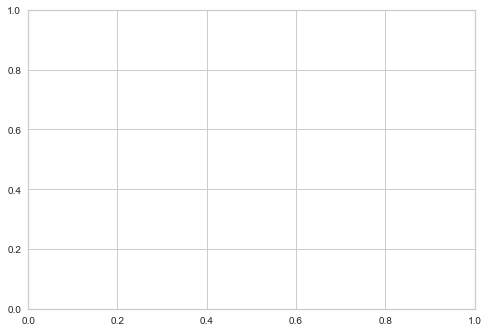

In [37]:
evaluate_model(model)

## 15000

In [38]:
df = pd.read_csv(r'data_syn_15000.csv', encoding='utf-8')
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

# float들을 int로 바꿔줘야 된다.
dict_round = {}
for column in numeric_features:
    dict_round[column] = 0
# print(dict_round)
    
df = df.round(dict_round)
display(df)

df['pp_longevity_10y'].value_counts()

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,salary_executives,regular,executives,regular,bachelor,M,1,0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,salary_plain,regular,white_collar,regular,college,M,1,0,3.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,salary_plain,regular,white_collar,regular,bachelor,M,1,0,1.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
3,hourly_field,regular,empty,temporary,high_school,M,1,0,-0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
4,hourly_field,regular,empty,temporary,bachelor,M,1,1,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,daily,daily,daily,daily,empty,M,1,0,-0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1296,salary_plain,regular,technical,regular,empty,M,1,0,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1297,daily,daily,daily,daily,empty,M,1,0,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1298,salary_executives,regular,white_collar,regular,college,M,1,0,3.0,-0.0,...,0,0,0,0,0,0,0,0,0,0


0    1224
1      76
Name: pp_longevity_10y, dtype: int64

In [39]:
exp_without_fix_imbal = setup(data = df, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1300, 61)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [40]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9670,0.9512,0.4000,1.0000,0.5714,0.5575,0.6217
1,0.9451,0.8186,0.4000,0.5000,0.4444,0.4159,0.4188
2,0.9451,0.9209,0.4000,0.5000,0.4444,0.4159,0.4188
3,0.9341,0.9233,0.6000,0.4286,0.5000,0.4658,0.4733
4,0.9341,0.8395,0.4000,0.4000,0.4000,0.3651,0.3651
5,0.9341,0.7674,0.0000,0.0000,0.0000,-0.0187,-0.0254
6,0.9560,0.8627,0.5000,0.7500,0.6000,0.5777,0.5911
7,0.9121,0.7784,0.0000,0.0000,0.0000,-0.0341,-0.0398
8,0.9011,0.8196,0.0000,0.0000,0.0000,-0.0460,-0.0491
9,0.9556,0.9412,0.4000,0.6667,0.5000,0.4783,0.4954


In [41]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 20000

In [42]:
df = pd.read_csv(r'data_syn_20000.csv', encoding='utf-8')
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

# float들을 int로 바꿔줘야 된다.
dict_round = {}
for column in numeric_features:
    dict_round[column] = 0
# print(dict_round)
    
df = df.round(dict_round)
display(df)

df['pp_longevity_10y'].value_counts()

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,salary_plain,regular,empty,regular,empty,M,1,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,hourly_field,regular,white_collar,temporary,high_school,M,1,0,2.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,salary_plain,regular,white_collar,temporary,bachelor,M,1,0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,salary_plain,regular,empty,regular,bachelor,M,1,0,-0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,salary_plain,regular,management,regular,college,M,1,0,2.0,0.0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,salary_plain,regular,technical,regular,bachelor,M,1,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1296,salary_plain,regular,white_collar,regular,graduate,F,1,0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1297,hourly_field,regular,production,temporary,college,M,1,0,1.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1298,salary_plain,regular,technical,regular,empty,M,1,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


0    1147
1     153
Name: pp_longevity_10y, dtype: int64

In [43]:
exp_without_fix_imbal = setup(data = df, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1300, 61)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [44]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9121,0.8556,0.4000,0.6667,0.5000,0.4551,0.4730
1,0.9231,0.9654,0.8000,0.6154,0.6957,0.6525,0.6598
2,0.8681,0.8341,0.2727,0.4286,0.3333,0.2642,0.2725
3,0.9231,0.9432,0.6364,0.7000,0.6667,0.6233,0.6242
4,0.9011,0.9159,0.2727,0.7500,0.4000,0.3587,0.4138
5,0.9341,0.8591,0.5455,0.8571,0.6667,0.6321,0.6520
6,0.8791,0.9398,0.5455,0.5000,0.5217,0.4527,0.4533
7,0.9121,0.8750,0.3636,0.8000,0.5000,0.4591,0.5023
8,0.8791,0.8500,0.3636,0.5000,0.4211,0.3554,0.3611
9,0.9111,0.8112,0.4000,0.6667,0.5000,0.4545,0.4725


In [45]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 30000

In [50]:
df = pd.read_csv(r'data_syn_30000.csv', encoding='utf-8')
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

# float들을 int로 바꿔줘야 된다.
dict_round = {}
for column in numeric_features:
    dict_round[column] = 0
# print(dict_round)
    
df = df.round(dict_round)
display(df)

df['pp_longevity_10y'].value_counts()

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,salary_plain,regular,executives,regular,empty,M,1,0,4.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1,hourly_field,regular,white_collar,temporary,high_school,M,1,0,5.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
2,salary_plain,regular,technical,regular,bachelor,M,1,0,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,salary_executives,regular,executives,regular,bachelor,M,1,0,3.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,hourly_field,regular,empty,temporary,high_school,M,1,0,-0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,salary_plain,regular,empty,regular,empty,M,1,0,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1296,salary_plain,daily,white_collar,regular,empty,M,1,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1297,salary_plain,regular,technical,regular,bachelor,M,1,0,0.0,-0.0,...,0,0,0,0,0,1,0,0,0,0
1298,hourly_field,regular,white_collar,regular,college,M,1,0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,1


0    1204
1      96
Name: pp_longevity_10y, dtype: int64

In [51]:
exp_without_fix_imbal = setup(data = df, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1300, 61)"
4,Missing Values,False
5,Numeric Features,20
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [52]:
model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9341,0.8784,0.3333,0.5000,0.4000,0.3666,0.3750
1,0.9451,0.8843,0.3333,0.6667,0.4444,0.4189,0.4469
2,0.9560,0.9456,0.8571,0.6667,0.7500,0.7263,0.7332
3,0.9231,0.8622,0.1429,0.5000,0.2222,0.1947,0.2380
4,0.9451,0.9082,0.4286,0.7500,0.5455,0.5185,0.5416
5,0.9231,0.8741,0.4286,0.5000,0.4615,0.4204,0.4218
6,0.9231,0.7840,0.1429,0.5000,0.2222,0.1947,0.2380
7,0.9560,0.9762,0.7143,0.7143,0.7143,0.6905,0.6905
8,0.9341,0.7721,0.4286,0.6000,0.5000,0.4658,0.4733
9,0.9556,0.8333,0.5000,0.7500,0.6000,0.5775,0.5908


In [53]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
df = pd.read_csv(r'data_syn_3000.csv', encoding='utf-8')
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

# float들을 int로 바꿔줘야 된다.
dict_round = {}
for column in numeric_features:
    dict_round[column] = 0
# print(dict_round)
    
df = df.round(dict_round)
display(df)

df['pp_longevity_10y'].value_counts()

exp_without_fix_imbal = setup(data = df, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)
model = create_model('xgboost')
evaluate_model(model)